In [1]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [3]:
if __name__ == "__main__":
    if 'ipykernel_launcher' in sys.argv[0]:
        # Running inside a Jupyter Notebook
        args = None  # Or set default arguments
    else:
        parser = argparse.ArgumentParser()
        parser.add_argument('--mode', type=str, help='Mode of operation')
        args = parser.parse_args()

In [4]:
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    tick_positions = np.arange(1, len(model_history.history['accuracy']) + 1, len(model_history.history['accuracy']) // 10)
    axs[0].set_xticks(tick_positions)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    tick_positions1 = np.arange(1, len(model_history.history['loss']) + 1, len(model_history.history['loss']) // 10)
    axs[1].set_xticks(tick_positions1)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [5]:
train_dir = r'C:\Users\Sumana\Desktop\ML\MLprojects\face_expression_detection-main\data\train'
val_dir = r'C:\Users\Sumana\Desktop\ML\MLprojects\face_expression_detection-main\data\test'


In [6]:
num_train = 28709
num_val = 7178
batch_size = 64
num_epoch = 50

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [9]:
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

C:\Users\sange\AppData\Local\Temp\ipykernel_11244\620083490.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info = model.fit_generator(


Epoch 1/50



448/448 [==============================] - 87s 190ms/step - loss: 1.7314 - accuracy: 0.2962 - val_loss: 1.5293 - val_accuracy: 0.4113
Epoch 2/50
448/448 [==============================] - 72s 162ms/step - loss: 1.4516 - accuracy: 0.4400 - val_loss: 1.3051 - val_accuracy: 0.5071
Epoch 3/50
448/448 [==============================] - 90s 200ms/step - loss: 1.2940 - accuracy: 0.5017 - val_loss: 1.2268 - val_accuracy: 0.5310
Epoch 4/50
448/448 [==============================] - 117s 260ms/step - loss: 1.2135 - accuracy: 0.5353 - val_loss: 1.1671 - val_accuracy: 0.5525
Epoch 5/50
448/448 [==============================] - 134s 299ms/step - loss: 1.1571 - accuracy: 0.5594 - val_loss: 1.1379 - val_accuracy: 0.5611
Epoch 6/50
448/448 [==============================] - 123s 275ms/step - loss: 1.1119 - accuracy: 0.5779 - val_loss: 1.1157 - val_accuracy: 0.5707
Epoch 7/50
448/448 [==============================] - 105s 235ms/step - loss: 1.0696 - accuracy: 0.5954 - val_loss: 1.0920 - val_accuracy:

TypeError: 5.0 must be a sequence

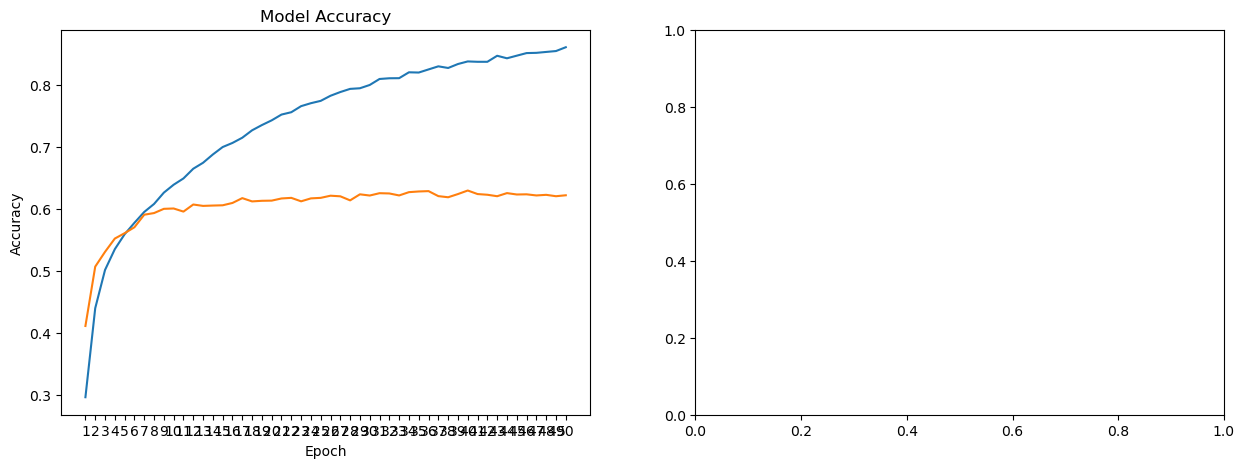

In [11]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])
model_info = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=num_epoch,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)

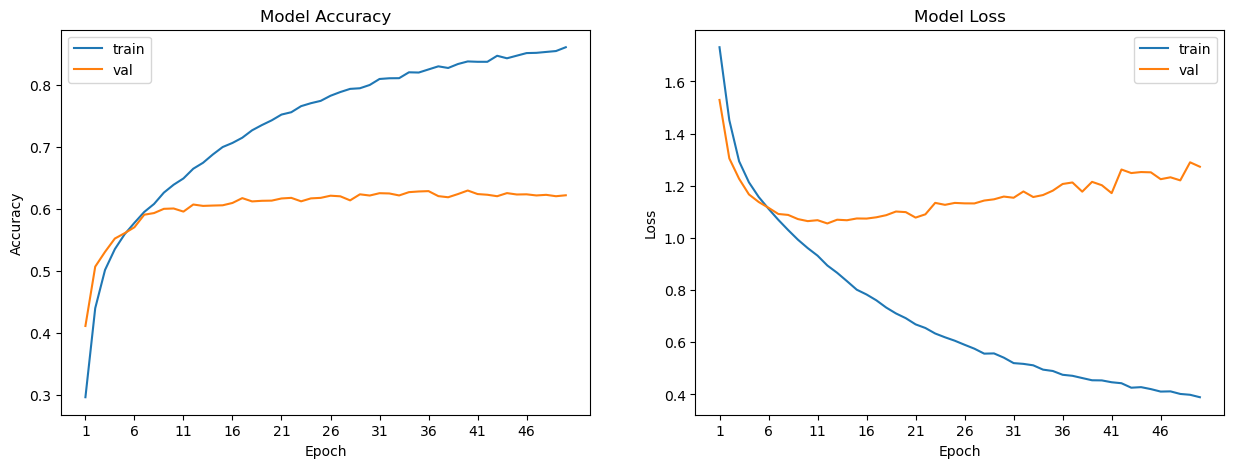

In [24]:
plot_model_history(model_info)